## 머신러닝으로 데이터 분석하기 : Logistic Regression(로지스틱 회귀)
---
### 사용 패키지 준비

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 데이터 불러오기

In [35]:
data = pd.read_csv('C:/Data/data.csv')
data = data_csv.apply(pd.to_numeric, errors='coerce').fillna(0)
data

,전운량,최저운고,강수량,기온,시정,풍향,풍속,현황
0,7,35,0,7.6,1000.0,20,4,0
1,6,35,0,6.8,1000.0,19,5,0
2,3,35,0,5.6,1000.0,18,6,0
3,3,35,0,5.6,1000.0,18,6,0
4,3,35,0,5.6,1000.0,18,6,0
...,...,...,...,...,...,...,...,...
143239,7,5,0,2.2,500.0,31,14,1
143240,7,5,0,2.2,500.0,31,14,1
143241,7,5,0,2.2,500.0,31,14,1
143242,7,10,0,2.5,500.0,33,14,1


### 학습 데이터, 타겟 데이터 지정하기
* 학습 데이터는 pandas의 DataFrame 타입으로 불러왔기 때문에 numpy 객체로 변환
* 학습 데이터의 컬럼 : 풍향, 풍속, 시정, 전운량, 최저운고, 기온, 강수량
* 타겟 데이터(예측할 데이터) : 현황

In [36]:
# 학습 데이터 
train_data = data[['전운량', '최저운고', '강수량', '기온', '시정', '풍향', '풍속']].to_numpy()
# 타겟 데이터 
target = data['현황'].to_numpy()

### 테스트 셋 분리하기
* train_test_split 사용 : 학습 데이터 셋, 테스트 데이터 셋 분리
* test_size : 30%

In [37]:
train_input, test_input, train_target, test_target = train_test_split(
train_data, target, test_size = 0.3)
# 데이터 셋 분리 확인
print(train_input.shape, test_input.shape)

(100270, 7) (42974, 7)


#### 데이터 스케일링 
* 모든 속성의 데이터 분포, 범위를 동일하게 조정

In [38]:
# 스케일링 
ss = StandardScaler()

# 학습 데이터 
ss.fit(train_input)

# 데이터 스케일링(스케일 조정)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#### 모델 학습시키기
* C : 제약조건의 강도 설정(높으면 낮은 강도의 제약조건)
* max_iter : 계산에 사용할 작업 수

In [39]:
# 로지스틱 회귀
lr = LogisticRegression(C=20,max_iter=100000)

# 학습
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=100000)

### 모델 성능평가
---
#### 정확도

In [40]:
print(f"학습 세트 정확도 : {lr.score(train_scaled, train_target)}")
print(f"테스트 세트 정확도: {lr.score(test_scaled, test_target)}")

학습 세트 정확도 : 0.7170439812506233
테스트 세트 정확도: 0.7172941778749942


#### 학습된 모델로 예측

In [41]:
y_pred = lr.predict(test_scaled)

#### 성능평가를 위해 혼동행렬 확인

In [42]:
print(confusion_matrix(test_target, y_pred))

[[16959  5062]
 [ 7087 13866]]


#### 혼동행렬 시각화

C:\Users\yeji4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yeji4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yeji4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yeji4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\yeji4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\yeji4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44050 missing from curre

([<matplotlib.axis.XTick at 0x272a68aec70>,
 [Text(0.5, 0, 'True'), Text(1.5, 0, 'False')])

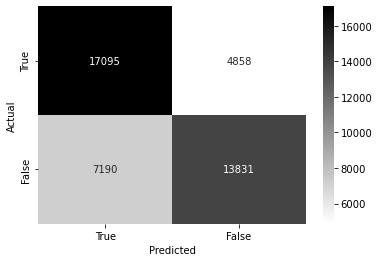

In [43]:
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

lr = {'예측값(P)' : [17095, 7190],
     '예측값(N)' : [4858, 13831]}
lr = DataFrame(lr)

sns.heatmap(lr, annot = True, fmt = 'd', cmap = 'gist_yarg')
plt.ylabel("Actual")
plt.yticks([0.5, 1.5], ['True', 'False'])
plt.xlabel('Predicted')
plt.xticks([0.5, 1.5], ['True', 'False'])

#### 성능평가를 위한 4가지 조건
* 정확도 : True를 True로 옳게 예측한 경우 + False를 False로 옳게 예측한 경우
* 정밀도 : True라고 분류한 것 중에서 실제 True인 경우
* 재현율 : 실제 True인 것 중에서 모델이 True라고 분류한 경우
* F1 score : 정밀도와 재현율의 조화평균 

In [44]:
print("정확도 : {: .2f}".format(accuracy_score(test_target, y_pred) * 100))
print("정밀도 : {: .2f}".format(precision_score(test_target, y_pred) * 100))
print("재현율 : {: .2f}".format(recall_score(test_target, y_pred) * 100))
print("F1-score : {: .2f}".format(f1_score(test_target, y_pred) * 100))

정확도 :  71.73
정밀도 :  73.26
재현율 :  66.18
F1-score :  69.54
